In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
iris_data = load_iris()
print(iris_data.data.shape)

(150, 4)


In [5]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
## Converting data Into an DataFrame 

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [11]:
labels = kmeans.labels_
print(labels)
df['Cluster'] = labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 0 3 3 2 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]


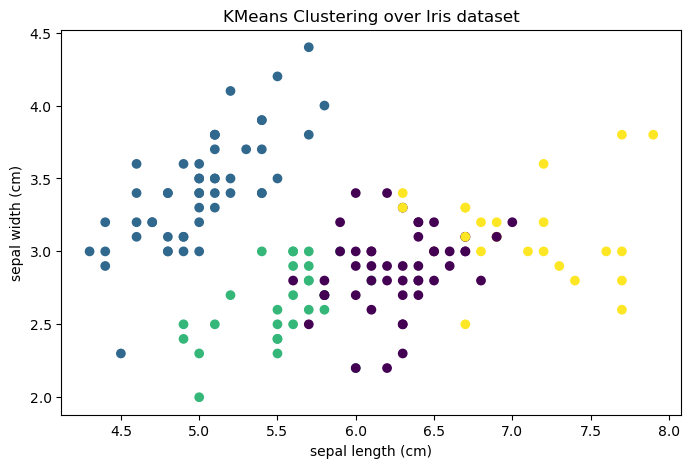

In [13]:
# Visualize clusters 
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title("KMeans Clustering over Iris dataset")
plt.show()

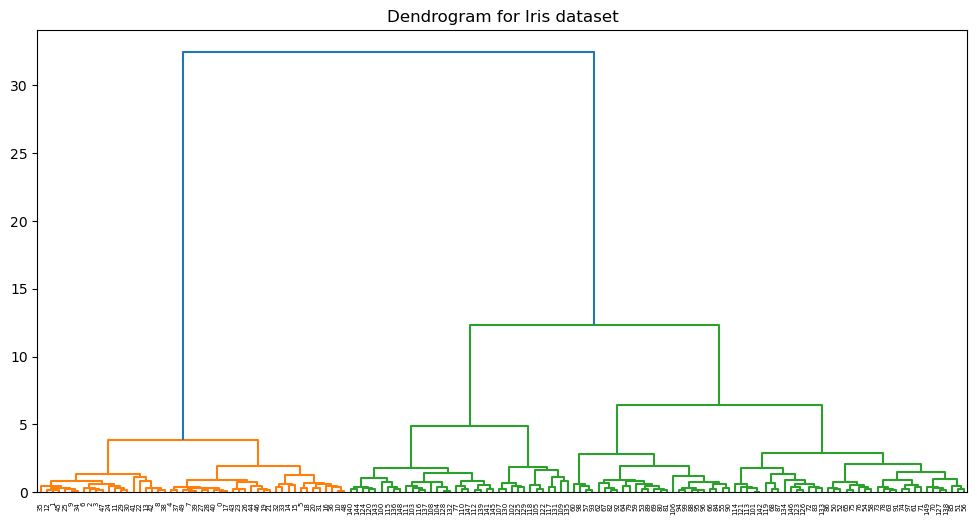

In [19]:
# Performing hierarchical clustering using 'ward' linkage
linked = linkage(df.iloc[:,:4], method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Iris dataset")
plt.show()

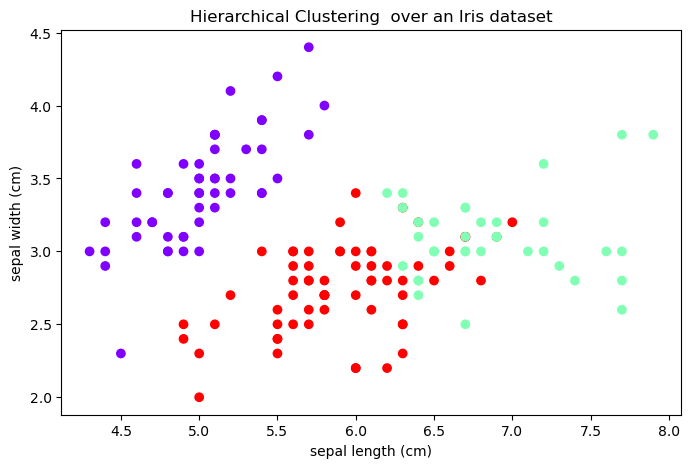

In [21]:

labels_hier = fcluster(linked, 3, criterion='maxclust')

# Visualize clusters using first two features
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels_hier, cmap='rainbow')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title("Hierarchical Clustering  over an Iris dataset")
plt.show()